In [338]:
import pandas as pd
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from minisom import MiniSom 
from matplotlib.pyplot import plot,axis,show,pcolor,colorbar,bone

font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)
%matplotlib inline
originalData = pd.read_csv("tomslee_airbnb_new_york_1196_2017-05-06.csv")
originalData = originalData[[ 'room_type','borough','accommodates', 'reviews', 'overall_satisfaction', 'bedrooms',
                          'price', 'longitude','latitude','property_type']]

originalData = originalData[originalData.overall_satisfaction.map(lambda x:not math.isnan(x))]
originalData = originalData[originalData.reviews.map(lambda x:x is not 0)]
originalData = originalData[originalData.price.map(lambda x: x<2000)]
originalData.reset_index(drop = True, inplace=True)
# display(originalData.describe())
# display(originalData.head())

In [340]:
# data overview
'''
display(originalData.describe())
display(originalData['borough'].value_counts())
display(originalData['room_type'].value_counts())
display(originalData['property_type'].value_counts())
'''

"\ndisplay(originalData.describe())\ndisplay(originalData['borough'].value_counts())\ndisplay(originalData['room_type'].value_counts())\ndisplay(originalData['property_type'].value_counts())\n"

In [341]:
sampledData = originalData.sample(frac=0.1).reset_index(drop=True)
usefulData = sampledData.sample(frac=1).reset_index(drop=True)
broughChosen = ['Manhattan', 'Brooklyn']
data = usefulData[usefulData['borough'].map(lambda x: x in broughChosen)]

In [342]:
display(data.head())

,room_type,borough,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude,property_type
1,Entire home/apt,Manhattan,9,28,5.0,4.0,325.0,-73.974808,40.792458,Apartment
2,Entire home/apt,Brooklyn,4,25,5.0,2.0,225.0,-73.989903,40.682550,Apartment
3,Private room,Brooklyn,1,1,0.0,1.0,45.0,-73.979207,40.662490,Apartment
4,Entire home/apt,Brooklyn,2,8,4.5,1.0,100.0,-73.961234,40.646152,Apartment
5,Private room,Brooklyn,2,14,5.0,1.0,75.0,-73.972038,40.649989,Apartment


,room_type,borough,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude,property_type
0,Entire home/apt,Manhattan,9,28,5.0,4.0,325.0,-73.974808,40.792458,Apartment
1,Entire home/apt,Brooklyn,4,25,5.0,2.0,225.0,-73.989903,40.682550,Apartment
2,Private room,Brooklyn,1,1,0.0,1.0,45.0,-73.979207,40.662490,Apartment
3,Entire home/apt,Brooklyn,2,8,4.5,1.0,100.0,-73.961234,40.646152,Apartment
4,Private room,Brooklyn,2,14,5.0,1.0,75.0,-73.972038,40.649989,Apartment


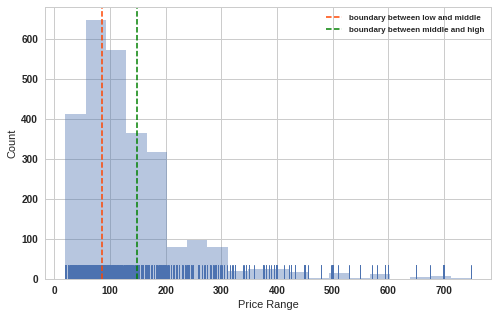

In [343]:
# view the distribution of price for the labeling later
tmp = data[data.price.map(lambda x: x<750)]
pricePlt = sns.distplot(tmp['price'].sort_values(), bins=20, kde=False, rug=True)
pricePlt.set_xlabel('Price Range')
pricePlt.set_ylabel('Count')
pricePlt.figure.set_size_inches(8,5)
plt.axvline(x = 85, linewidth=1.5, color = 'orangered',linestyle="--", label = 'boundary between low and middle')
plt.axvline(x = 149, linewidth=1.5, color = 'green',linestyle="--", label = 'boundary between middle and high')
plt.legend(loc = 'upper right',prop={'size':8})
data.reset_index(drop = True, inplace=True)
display(data.head())

In [344]:
lableLow = data['price'].map(lambda x: x <85)
lableMid = data['price'].map(lambda x: x<=149 and x >= 85)
lableHigh = data['price'].map(lambda x: x >149)
print(lableLow.value_counts(),lableMid.value_counts(), lableHigh.value_counts())
p1_price = data['price']
data_p1 = data.drop(axis=1,labels=['price'])

False    1801
True      909
Name: price, dtype: int64 False    1818
True      892
Name: price, dtype: int64 False    1801
True      909
Name: price, dtype: int64


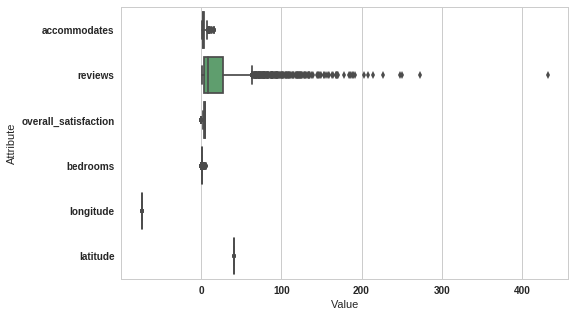

In [345]:
data_p1_coded = pd.get_dummies(data_p1)
sns.set_style("whitegrid")
boxplot = sns.boxplot(data=data_p1_coded.iloc[:,0:6], orient='h')
boxplot.set_yticklabels(data_p1_coded.columns);
boxplot.set_xlabel('Value')
boxplot.set_ylabel('Attribute')
boxplot.figure.set_size_inches(8,5)

In [347]:
data1 = np.array(data_p1_coded)
# display(data_p1_coded.tail().iloc[:3,:9])
x = (data1-data1.mean(axis=0))/data1.std(axis=0)
# tmp = pd.DataFrame(x)
# display(tmp.head())

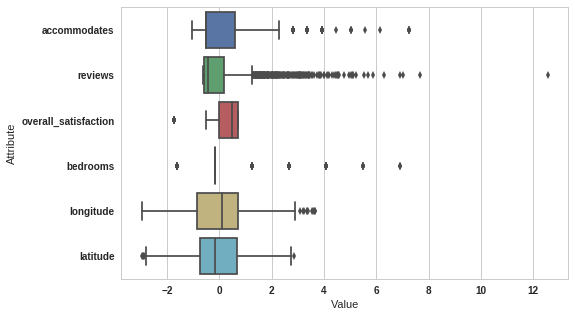

In [348]:
# plt.boxplot(x,vert=False);
plotNorm = sns.boxplot(data=x[:,0:6], orient='h')
plotNorm.set_yticklabels(data_p1_coded.columns);
# plotNorm.figure.set_size_inches(10,5)
plotNorm.set_xlabel('Value')
plotNorm.set_ylabel('Attribute')
plotNorm.figure.set_size_inches(8,5)

In [349]:
covMatrix = x.transpose().dot(x)/x.shape[0]
(eigenVals,eigneVectors)= np.linalg.eig(covMatrix)
idx = eigenVals.argsort()[::-1]   
eigenVals = eigenVals[idx]
eigneVectors = eigneVectors[:,idx]
totalEigenval = []
tmp = 0
eigenvalSum = sum(eigenVals)
for val in eigenVals:
    tmp += val
    totalEigenval.append(tmp/eigenvalSum)
print(totalEigenval)

[0.13734846649702218, 0.24761507170908567, 0.32318437066521882, 0.38091535108690716, 0.43675614845595595, 0.4874074262370599, 0.53212095006688875, 0.57663313439109365, 0.62074181987510435, 0.66446068593948926, 0.70811470442055846, 0.75166100504248035, 0.79513601146996737, 0.83777271171340773, 0.87922214400295284, 0.91711291314977916, 0.95394443680353047, 0.98214257730901189, 0.99375336627588939, 1.0, 1.0, 1.0, 1.0]


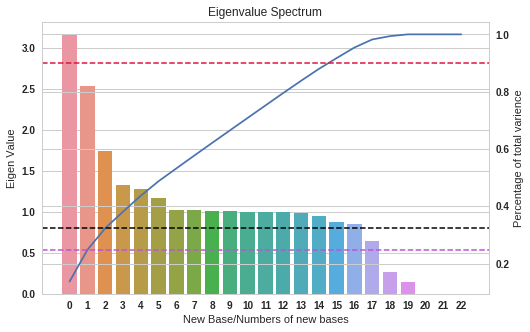

In [350]:
fig, ax1 = plt.subplots()
ploteig = sns.barplot(x=list(range(len(eigenVals))),y=eigenVals, ax=ax1)
plt.title("Eigenvalue Spectrum")
plt.xlabel("New Base/Numbers of new bases")
plt.ylabel("Eigen Value")
ploteig.figure.set_size_inches(8,5)
ax2 = ax1.twinx()
ax2.plot(totalEigenval)
ax2.set_ylabel('Percentage of total varience')
ax2.axhline(y = .9, linewidth=1.5, color = 'crimson',linestyle="--", label = '0.9')
ax2.axhline(y = totalEigenval[1], linewidth=1.5, color = 'mediumorchid',linestyle="--", label = 'Preserved variance in 2D Projection')
ax2.axhline(y = totalEigenval[2], linewidth=1.5, color = 'black',linestyle="--", label = 'Preserved variance in 3D Projection')
plt.savefig('images/eigenvalues1.png', format='png', dpi=200)

In [351]:
col = data_p1_coded.columns
for eigneVector in eigneVectors[:,0:3].transpose():
    idx = abs(eigneVector).argsort()[::-1]  
    print(col[idx], eigneVector[idx])

Index(['borough_Manhattan', 'borough_Brooklyn', 'latitude',
       'property_type_Apartment', 'longitude', 'property_type_House',
       'room_type_Private room', 'room_type_Entire home/apt',
       'property_type_Loft', 'bedrooms', 'property_type_Townhouse',
       'property_type_Bed & Breakfast', 'property_type_Condominium',
       'property_type_Boat', 'reviews', 'property_type_Other',
       'property_type_In-law', 'overall_satisfaction',
       'property_type_Guesthouse', 'property_type_Timeshare',
       'property_type_Hostel', 'accommodates', 'room_type_Shared room'],
      dtype='object') [-0.51484551  0.51484551 -0.41706656 -0.29132238  0.26209607  0.25374459
  0.15672518 -0.15512859  0.10969607  0.07541947  0.07434475  0.04338228
  0.03956861  0.02789726  0.02540349  0.02203346  0.0168112   0.0120791
  0.01156004 -0.00853119 -0.0077999  -0.00638827 -0.00219528]
Index(['room_type_Entire home/apt', 'room_type_Private room', 'accommodates',
       'bedrooms', 'overall_satisfacti

In [352]:
# x is actually X^T
X_tilde1 = x.dot(eigneVectors[:,:3])
X_tilde1 = pd.DataFrame(X_tilde1,columns=['x','y','z'])
X_tilde1['price'] = p1_price

In [353]:
def priceLabel(price):
    if price < 85:
        return 'low'
    elif price >= 149:
        return 'high'
    else:
        return 'middle'
X_tilde1['label'] = X_tilde1['price'].map(priceLabel)
color1 = {'high':'mediumorchid','middle':'darkorange', 'low':'deepskyblue'}
labels1 = ['high', 'middle', 'low']
dfList = []
for label in labels1:
    dfList.append(X_tilde1[X_tilde1.label.map(lambda x: x == label)])

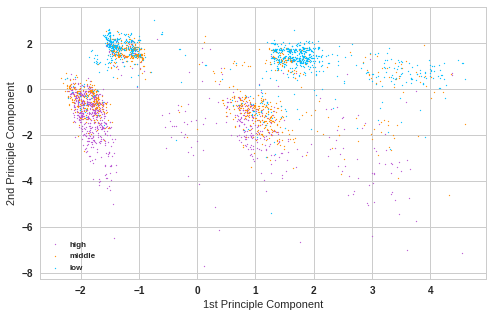

In [354]:
for (df, label) in zip(dfList, labels1):
    pca1_2d = plt.scatter(x = df.x, y = df.y, s = 1, c=color1[label], label=label)
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.legend(loc = 'lower left',prop={'size':8})
pca1_2d.figure.set_size_inches(8,5)
plt.savefig('images/pca1-2d.png', format='png', dpi=200)

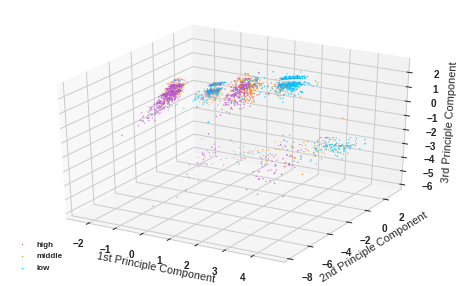

In [355]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for (df, label) in zip(dfList, labels1):
    pca1_3d = ax.scatter(df.x,df.y,df.z, s = 1, c=color1[label], label=label)
plt.legend(loc = 'lower left',prop={'size':8})
ax.set_xlabel("1st Principle Component")
ax.set_ylabel("2nd Principle Component")
ax.set_zlabel("3rd Principle Component")
pca1_3d.figure.set_size_inches(8,5)
plt.savefig('images/pca1-3d.png', format='png', dpi=200)
plt.show()

### Label overall satisfiction

In [356]:
display(data.head())

,room_type,borough,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude,property_type
0,Entire home/apt,Manhattan,9,28,5.0,4.0,325.0,-73.974808,40.792458,Apartment
1,Entire home/apt,Brooklyn,4,25,5.0,2.0,225.0,-73.989903,40.682550,Apartment
2,Private room,Brooklyn,1,1,0.0,1.0,45.0,-73.979207,40.662490,Apartment
3,Entire home/apt,Brooklyn,2,8,4.5,1.0,100.0,-73.961234,40.646152,Apartment
4,Private room,Brooklyn,2,14,5.0,1.0,75.0,-73.972038,40.649989,Apartment


In [357]:
overall_sa = data["overall_satisfaction"]
data_p2 = data.drop(axis=1,labels=["overall_satisfaction"])

In [358]:
data_p2.head()

,room_type,borough,accommodates,reviews,bedrooms,price,longitude,latitude,property_type
0,Entire home/apt,Manhattan,9,28,4.0,325.0,-73.974808,40.792458,Apartment
1,Entire home/apt,Brooklyn,4,25,2.0,225.0,-73.989903,40.682550,Apartment
2,Private room,Brooklyn,1,1,1.0,45.0,-73.979207,40.662490,Apartment
3,Entire home/apt,Brooklyn,2,8,1.0,100.0,-73.961234,40.646152,Apartment
4,Private room,Brooklyn,2,14,1.0,75.0,-73.972038,40.649989,Apartment


In [359]:
data_p2_coded = pd.get_dummies(data_p2)

In [360]:
data2 = np.array(data_p2_coded)
x2 = (data1-data1.mean(axis=0))/data1.std(axis=0)

In [361]:
covMatrix2 = x2.transpose().dot(x)/x2.shape[0]
(eigenVals2,eigneVectors2)= np.linalg.eig(covMatrix2)
idx = eigenVals2.argsort()[::-1]   
eigenVals2 = eigenVals2[idx]
eigneVectors2 = eigneVectors2[:,idx]
totalEigenval2 = []
tmp = 0
eigenvalSum2 = sum(eigenVals2)
for val in eigenVals2:
    tmp += val
    totalEigenval2.append(tmp/eigenvalSum2)
print(totalEigenval)

[0.13734846649702218, 0.24761507170908567, 0.32318437066521882, 0.38091535108690716, 0.43675614845595595, 0.4874074262370599, 0.53212095006688875, 0.57663313439109365, 0.62074181987510435, 0.66446068593948926, 0.70811470442055846, 0.75166100504248035, 0.79513601146996737, 0.83777271171340773, 0.87922214400295284, 0.91711291314977916, 0.95394443680353047, 0.98214257730901189, 0.99375336627588939, 1.0, 1.0, 1.0, 1.0]


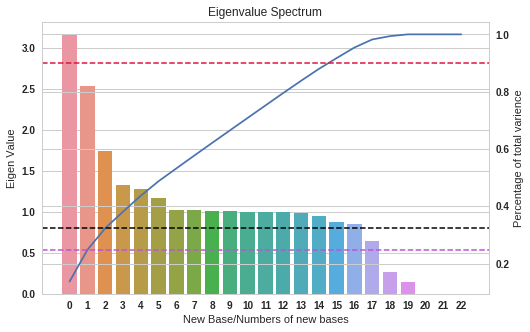

In [362]:
fig, ax1 = plt.subplots()
ploteig = sns.barplot(x=list(range(len(eigenVals2))),y=eigenVals2, ax=ax1)
plt.title("Eigenvalue Spectrum")
plt.xlabel("New Base/Numbers of new bases")
plt.ylabel("Eigen Value")
ploteig.figure.set_size_inches(8,5)
ax2 = ax1.twinx()
ax2.plot(totalEigenval)
ax2.set_ylabel('Percentage of total varience')
ax2.axhline(y = .9, linewidth=1.5, color = 'crimson',linestyle="--", label = '0.9')
ax2.axhline(y = totalEigenval[1], linewidth=1.5, color = 'mediumorchid',linestyle="--", label = 'Preserved variance in 2D Projection')
ax2.axhline(y = totalEigenval[2], linewidth=1.5, color = 'black',linestyle="--", label = 'Preserved variance in 3D Projection')
plt.savefig('images/eigenvalues2.png', format='png', dpi=200)

In [363]:
col2 = data_p2_coded.columns
for eigneVector2 in eigneVectors2[:,0:3].transpose():
    idx = abs(eigneVector2).argsort()[::-1]  
    print(col2[idx], eigneVector2[idx])

Index(['borough_Manhattan', 'borough_Brooklyn', 'latitude',
       'property_type_Apartment', 'longitude', 'property_type_House',
       'room_type_Private room', 'room_type_Entire home/apt',
       'property_type_Loft', 'price', 'property_type_Townhouse',
       'property_type_Bed & Breakfast', 'property_type_Condominium',
       'property_type_Boat', 'reviews', 'property_type_Other',
       'property_type_In-law', 'bedrooms', 'property_type_Guesthouse',
       'property_type_Timeshare', 'property_type_Hostel', 'accommodates',
       'room_type_Shared room'],
      dtype='object') [-0.51484551  0.51484551 -0.41706656 -0.29132238  0.26209607  0.25374459
  0.15672518 -0.15512859  0.10969607  0.07541947  0.07434475  0.04338228
  0.03956861  0.02789726  0.02540349  0.02203346  0.0168112   0.0120791
  0.01156004 -0.00853119 -0.0077999  -0.00638827 -0.00219528]
Index(['room_type_Entire home/apt', 'room_type_Private room', 'accommodates',
       'price', 'bedrooms', 'latitude', 'reviews', 'p

In [364]:
# x is actually X^T
X_tilde2 = x.dot(eigneVectors[:,:3])
X_tilde2 = pd.DataFrame(X_tilde1,columns=['x','y','z'])
X_tilde2['overall'] = overall_sa

In [365]:
X_tilde2.overall.value_counts()

5.0    1012
4.5     872
0.0     664
4.0     129
3.5      29
3.0       2
2.5       2
Name: overall, dtype: int64

In [366]:
print(X_tilde2.overall.value_counts())
def overallLabel(overall):
    if overall <= 4:
        return 'low'
    elif overall == 4.5:
        return 'median'
    else:
        return 'high'
X_tilde2['label'] = X_tilde2['overall'].map(overallLabel)
color2 = {'high':'mediumorchid','median':'darkorange', 'low':'deepskyblue'}
labels2 = ['high', 'median', 'low']
dfList2 = []
for label in labels2:
    dfList2.append(X_tilde2[X_tilde2.label.map(lambda x: x == label)])

5.0    1012
4.5     872
0.0     664
4.0     129
3.5      29
3.0       2
2.5       2
Name: overall, dtype: int64


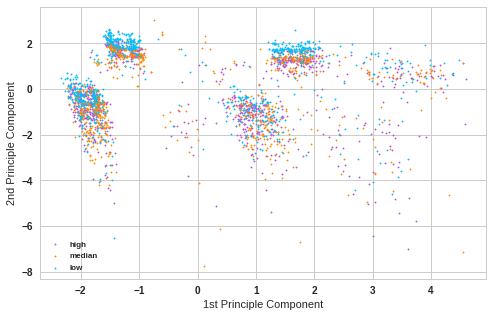

In [367]:
for (df, label) in zip(dfList2, labels2):
    pca1_2d = plt.scatter(x = df.x, y = df.y, s = 2, c=color2[label], label=label)
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.legend(loc = 'lower left',prop={'size':8})
pca1_2d.figure.set_size_inches(8,5)
plt.savefig('images/pca2-2d.png', format='png', dpi=200)

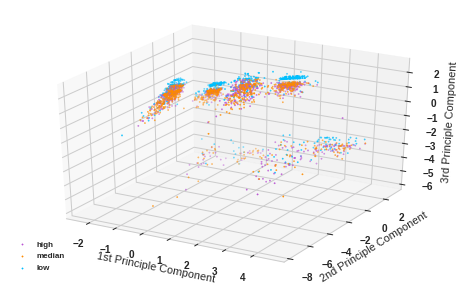

In [368]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for (df, label) in zip(dfList2, labels2):
    pca1_3d = ax.scatter(df.x,df.y,df.z, s = 2, c=color2[label], label=label)
plt.legend(loc = 'lower left',prop={'size':8})
ax.set_xlabel("1st Principle Component")
ax.set_ylabel("2nd Principle Component")
ax.set_zlabel("3rd Principle Component")
pca1_3d.figure.set_size_inches(8,5)
plt.savefig('images/pca2-3d.png', format='png', dpi=200)
plt.show()

### Comparision of two borough

In [369]:
X_tilde1_b1 = X_tilde1[data.borough.map(lambda x: x == 'Manhattan')]
X_tilde1_b2 = X_tilde1[data.borough.map(lambda x: x == 'Brooklyn')]

In [179]:
X_tilde1.head()

,x,y,z,price,label
0,-1.607043,1.735547,-0.045296,195.0,high
1,1.515283,-1.393632,0.424074,84.0,low
2,1.762335,-1.345503,0.717266,80.0,low
3,3.672933,-0.420610,-2.144002,69.0,low
4,-1.768275,0.981213,0.222492,200.0,high


In [370]:
labels = ['high', 'middle', 'low']
dfList3_1 = []
dfList3_2 = []
for label in labels:
    dfList3_1.append(X_tilde1_b1[X_tilde1_b1.label.map(lambda x: x == label)])
    dfList3_2.append(X_tilde1_b2[X_tilde1_b2.label.map(lambda x: x == label)])    

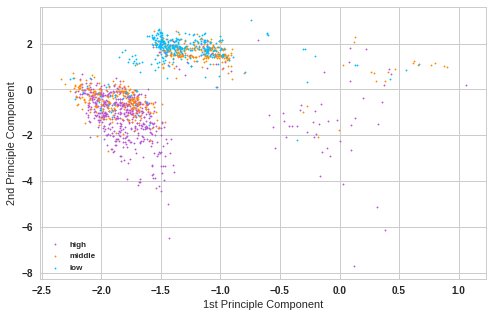

In [371]:
for (df, label) in zip(dfList3_1, labels):
    pca1_2d = plt.scatter(x = df.x, y = df.y, s = 2, c=color1[label], label=label)
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.legend(loc = 'lower left',prop={'size':8})
pca1_2d.figure.set_size_inches(8,5)
plt.savefig('images/pca3-1.png', format='png', dpi=200)

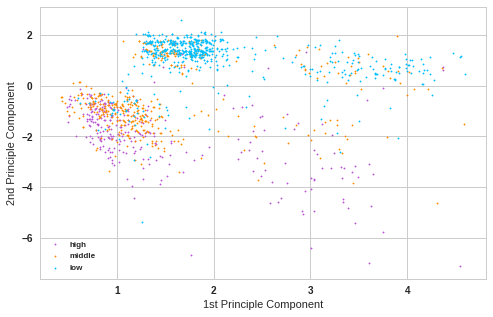

In [372]:
for (df, label) in zip(dfList3_2, labels):
    pca1_2d = plt.scatter(x = df.x, y = df.y, s = 2, c=color1[label], label=label)
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.legend(loc = 'lower left',prop={'size':8})
pca1_2d.figure.set_size_inches(8,5)
plt.savefig('images/pca3-2.png', format='png', dpi=200)

### 2D-Projection

In [408]:
data_coded = pd.get_dummies(data)
dataNomolizaed = (data_coded - data_coded.mean())/data_coded.std()
dataNomolizaed['pricelabel'] = X_tilde1.label
dataNomolizaed['satisfictionLabel'] = X_tilde2.label
display(dataNomolizaed.head())

,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,...,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_In-law,property_type_Loft,property_type_Other,property_type_Timeshare,property_type_Townhouse,pricelabel,satisfictionLabel
0,3.367807,0.194206,0.711035,4.080170,1.736362,-0.444970,1.227217,0.927872,-0.878042,-0.167519,...,-0.033284,-0.03844,-0.249611,-0.019209,-0.168679,-0.069415,-0.027171,-0.117631,high,high
1,0.608812,0.102479,0.711035,1.236224,0.807852,-1.035781,-0.881225,0.927872,-0.878042,-0.167519,...,-0.033284,-0.03844,-0.249611,-0.019209,-0.168679,-0.069415,-0.027171,-0.117631,high,high
2,-1.046586,-0.631335,-1.735828,-0.185748,-0.863467,-0.617145,-1.266051,-1.077337,1.138478,-0.167519,...,-0.033284,-0.03844,-0.249611,-0.019209,-0.168679,-0.069415,-0.027171,-0.117631,low,low
3,-0.494787,-0.417306,0.466349,-0.185748,-0.352786,0.086309,-1.579474,0.927872,-0.878042,-0.167519,...,-0.033284,-0.03844,-0.249611,-0.019209,-0.168679,-0.069415,-0.027171,-0.117631,middle,median
4,-0.494787,-0.233853,0.711035,-0.185748,-0.584914,-0.336554,-1.505866,-1.077337,1.138478,-0.167519,...,-0.033284,-0.03844,-0.249611,-0.019209,-0.168679,-0.069415,-0.027171,-0.117631,low,high


In [374]:
data.room_type.value_counts()

Entire home/apt    1456
Private room       1180
Shared room          74
Name: room_type, dtype: int64

In [375]:
dfListPair1 = []
dfListPair2 = []
dfListPair4 = []
dfListPair3 = []
marker1 = {'low':'2','middle':'1','high':'3'}
labels3 = ['Manhattan', 'Brooklyn']
labels4 = ['Entire home/apt', 'Private room', 'Shared room']
for label in labels1:
    dfListPair1.append(data[X_tilde1.label.map(lambda x: x == label)])
for label in labels2:
    dfListPair2.append(data[X_tilde2.label.map(lambda x: x == label)])
for label in labels3:
    dfListPair3.append(data[data.borough.map(lambda x: x == label)])
for label in labels4:
    dfListPair4.append(data[data.room_type.map(lambda x: x == label)])

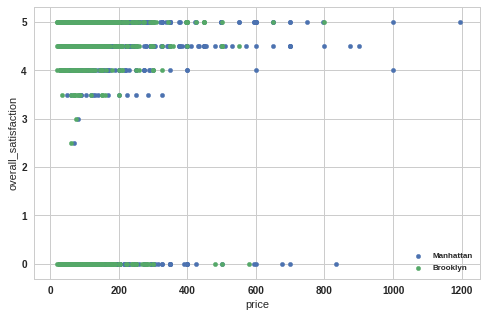

In [376]:
for (df, label) in zip(dfListPair3, labels3):
    pairPlt = plt.scatter(x = df.price, y = df.overall_satisfaction, s = 20, label=label)
plt.xlabel("price")
plt.ylabel("overall_satisfaction")
plt.legend(loc = 'lower right',prop={'size':8})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-over-price1.png', format='png', dpi=200)

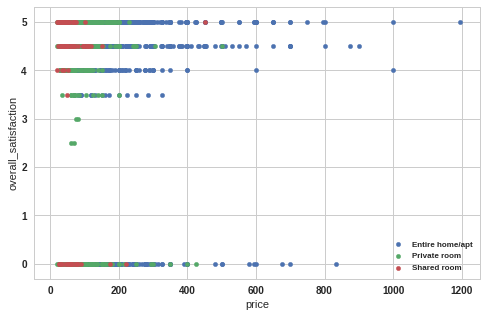

In [377]:
for (df, label) in zip(dfListPair4, labels4):
    pairPlt = plt.scatter(x = df.price, y = df.overall_satisfaction, s = 20, label=label)
plt.xlabel("price")
plt.ylabel("overall_satisfaction")
plt.legend(loc = 'lower right',prop={'size':8})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-over-price2.png', format='png', dpi=200)

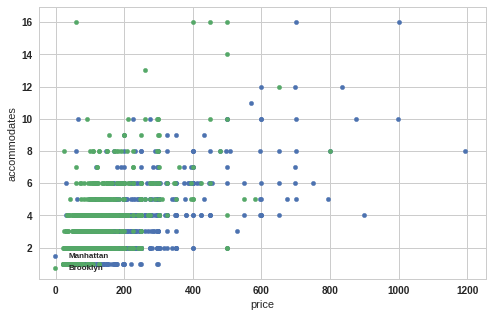

In [378]:
for (df, label) in zip(dfListPair3, labels3):
    pairPlt = plt.scatter(x = df.price, y = df.accommodates, s = 20, label=label)
plt.xlabel("price")
plt.ylabel("accommodates")
plt.legend(loc = 'lower left',prop={'size':8})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-acc-price.png', format='png', dpi=200)

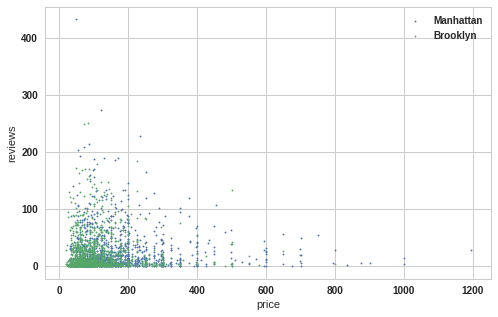

In [379]:
for (df, label) in zip(dfListPair3, labels3):
    pairPlt = plt.scatter(x = df.price, y = df.reviews, s =2, label=label)
plt.xlabel("price")
plt.ylabel("reviews")
plt.legend(loc = 'upper right',prop={'size':10})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-reviews-price1.png', format='png', dpi=200)

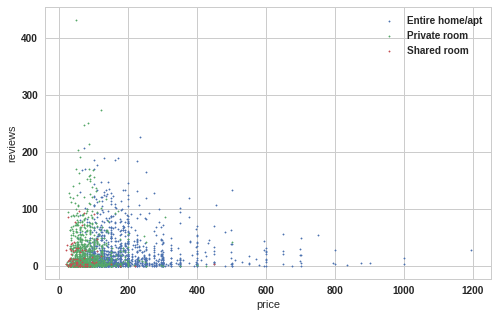

In [380]:
for (df, label) in zip(dfListPair4, labels4):
    pairPlt = plt.scatter(x = df.price, y = df.reviews, s =2, label=label)
plt.xlabel("price")
plt.ylabel("reviews")
plt.legend(loc = 'upper right',prop={'size':10})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-reviews-price2.png', format='png', dpi=200)

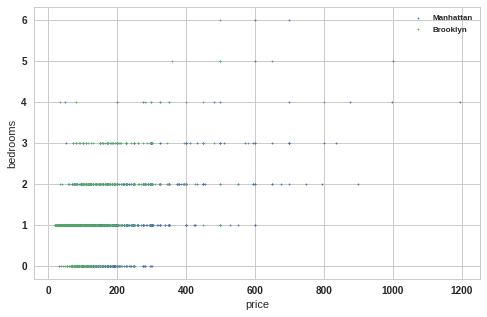

In [381]:
for (df, label) in zip(dfListPair3, labels3):
    pairPlt = plt.scatter(x = df.price, y = df.bedrooms, s = 2, label=label)
plt.xlabel("price")
plt.ylabel("bedrooms")
plt.legend(loc = 'upper right',prop={'size':8})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-bedrooms-price.png', format='png', dpi=200)

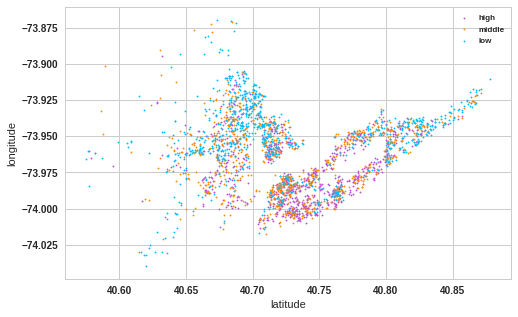

In [382]:
for (df, label) in zip(dfListPair1, labels1):
    pairPlt = plt.scatter(x = df.latitude, y = df.longitude, s = 2,color = color1[label], label=label)
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.legend(loc = 'upper right',prop={'size':8})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-bedrooms-price.png', format='png', dpi=200)

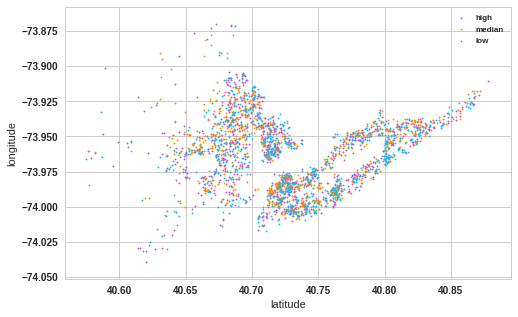

In [383]:
for (df, label) in zip(dfListPair2, labels2):
    pairPlt = plt.scatter(x = df.latitude, y = df.longitude, s = 2,color = color2[label], label=label)
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.legend(loc = 'upper right',prop={'size':8})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-bedrooms-price.png', format='png', dpi=200)

### SOM of the dataset

In [384]:
dataNomolizaed.columns

Index(['accommodates', 'reviews', 'overall_satisfaction', 'bedrooms', 'price',
       'longitude', 'latitude', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'borough_Brooklyn',
       'borough_Manhattan', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Condominium', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_In-law',
       'property_type_Loft', 'property_type_Other', 'property_type_Timeshare',
       'property_type_Townhouse', 'pricelabel', 'satisfictionLabel'],
      dtype='object')

In [385]:
somdata1df = dataNomolizaed.drop(axis=1, labels=['price', 'pricelabel', 'satisfictionLabel'])
somdata1 = np.array(somdata1df)
print(somdata1.shape)

(2710, 23)


## SOM
#### Maybe need more extreme labelling

In [435]:
som = MiniSom(20, 20, 23, sigma=1.3, learning_rate=0.8) 
som.train_random(somdata1,800) # trains the SOM with 100 iterations

Index(['accommodates', 'reviews', 'overall_satisfaction', 'bedrooms',
       'longitude', 'latitude', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'borough_Brooklyn',
       'borough_Manhattan', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Condominium', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_In-law',
       'property_type_Loft', 'property_type_Other', 'property_type_Timeshare',
       'property_type_Townhouse'],
      dtype='object')


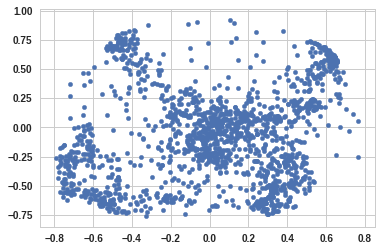

In [438]:
print(somdata1df.columns)
xyz = som.weights.dot(eigneVectors[:,:3])
plt.scatter(x = xyz[:,:,0], y =xyz[:,: , 1], s = 20)

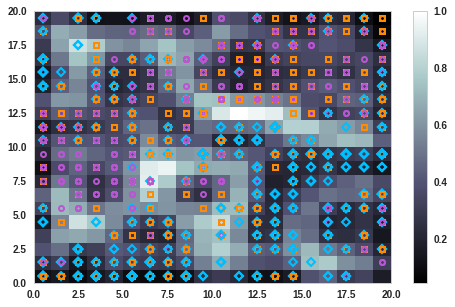

In [436]:
#Plot som
bone()
somplt1 = pcolor(som.distance_map().T) # plotting the distance map as background
colorbar()
plt.savefig('images/som-price.png', format='png', dpi=200)
# use different colors and markers for each label
markers1 = {'high':'o','middle':'s','low':'D'}
for cnt,xx in enumerate(somdata1):
    w = som.winner(xx) # getting the winner
    # place a marker on the winning position for the sample xx
    plt.plot(w[0]+.5,w[1]+.5,markers1[dataNomolizaed.loc[cnt,'pricelabel']],markerfacecolor='None',
         markeredgecolor=color1[dataNomolizaed.loc[cnt,'pricelabel']],markersize=5,markeredgewidth=2)
somplt1.figure.set_size_inches(8,5)
plt.savefig('images/som-price-label.png', format='png', dpi=200)
# axis([191,198,110,117])
show() # show the figure

In [441]:
somdata2 = np.array(dataNomolizaed.drop(axis=1, labels=['overall_satisfaction',
                                                        'pricelabel', 'satisfictionLabel']))
print(somdata2.shape)

(2710, 23)


In [448]:
som = MiniSom(20, 20, 23, sigma=1.3, learning_rate=0.8) 
som.train_random(somdata2,800) # trains the SOM with 100 iterations

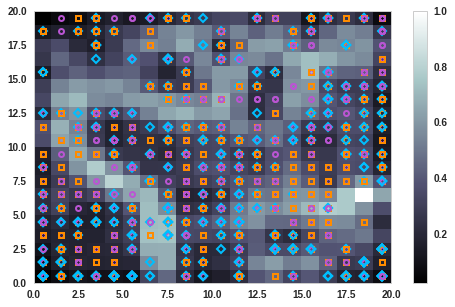

In [449]:
#Plot som
bone()
somplt2 = pcolor(som.distance_map().T) # plotting the distance map as background
colorbar()
plt.savefig('images/som-satisfication.png', format='png', dpi=200)
# use different colors and markers for each label
markers2 = {'high':'o','median':'s','low':'D'}
for cnt,xx in enumerate(somdata2):
    w = som.winner(xx) # getting the winner
    # place a marker on the winning position for the sample xx
    plt.plot(w[0]+.5,w[1]+.5,markers2[dataNomolizaed.loc[cnt,'satisfictionLabel']],markerfacecolor='None',
         markeredgecolor=color2[dataNomolizaed.loc[cnt,'satisfictionLabel']],markersize=5,markeredgewidth=2)
somplt2.figure.set_size_inches(8,5)

plt.savefig('images/som-satisfication-label.png', format='png', dpi=200)
# axis([191,198,110,117])
show() # show the figure

### SOM on the projected Data

In [450]:
data1_projected.shape

(2710, 3)

In [451]:
data1_projected = np.array(X_tilde1.loc[:,['x','y','z']])
som = MiniSom(40, 40, 3, sigma=1.3, learning_rate=0.8) 
som.train_random(data1_projected,500) # trains the SOM with 100 iterations

In [452]:
som.quantization_error(data1_projected) #100

1.5712330039299334

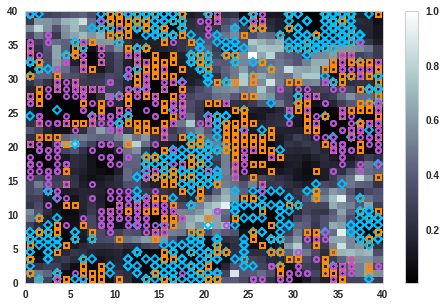

In [453]:
#Plot som
bone()
somplt2 = pcolor(som.distance_map().T) # plotting the distance map as background
colorbar()
plt.savefig('images/som-pca-price.png', format='png', dpi=200)
# use different colors and markers for each label
for cnt,xx in enumerate(data1_projected):
    w = som.winner(xx) # getting the winner
    # place a marker on the winning position for the sample xx
    plt.plot(w[0]+.5,w[1]+.5,markers1[X_tilde1.loc[cnt,'label']],markerfacecolor='None',
         markeredgecolor=color1[X_tilde1.loc[cnt,'label']],markersize=5,markeredgewidth=2)
somplt2.figure.set_size_inches(8,5)

plt.savefig('images/som-pca-price-label.png', format='png', dpi=200)
# axis([191,198,110,117])
show() # show the figure

#### What about codebook vectors?

### Clustering

In [454]:
datanorm = dataNomolizaed.drop(axis=1,labels=["satisfictionLabel","pricelabel"])
print(datanorm.columns)
datanorm1 = datanorm.drop(axis=1,labels=["price"])
datanorm2 = datanorm.drop(axis=1,labels=["overall_satisfaction"])

Index(['accommodates', 'reviews', 'overall_satisfaction', 'bedrooms', 'price',
       'longitude', 'latitude', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'borough_Brooklyn',
       'borough_Manhattan', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Condominium', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_In-law',
       'property_type_Loft', 'property_type_Other', 'property_type_Timeshare',
       'property_type_Townhouse'],
      dtype='object')


In [455]:
def ClusterTest(trainDataset, n_clusters, figureName, plotDataset):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(trainDataset)
    dfListCluster = []
    for label in range(n_clusters):
        dfListCluster.append(plotDataset[pd.Series(kmeans.labels_).map(lambda x: x == label)])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for (df, label) in zip(dfListCluster, range(n_clusters)):
        pca1_3d = ax.scatter(df.x,df.y,df.z, s = 5)
    # plt.legend(loc = 'lower left',prop={'size':8})
    ax.set_xlabel("1st Principle Component")
    ax.set_ylabel("2nd Principle Component")
    ax.set_zlabel("3rd Principle Component")
    pca1_3d.figure.set_size_inches(8,5)
    plt.savefig('images/%s-%d.png' % (figureName, n_clusters) , format='png', dpi=200)
    plt.show()

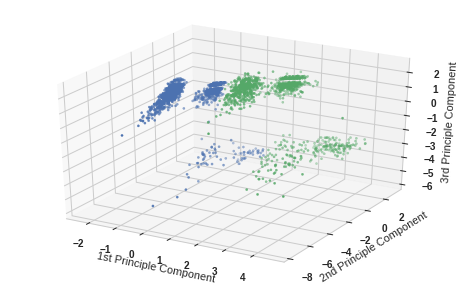

In [456]:
ClusterTest(datanorm1, 2, 'KMeans-trainbywhole',X_tilde1)

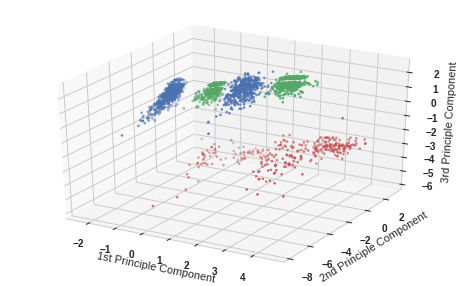

In [457]:
ClusterTest(datanorm1, 3, 'KMeans-trainbywhole',X_tilde1)

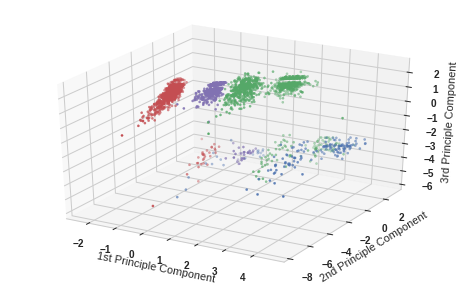

In [458]:
ClusterTest(datanorm1, 4, 'KMeans-trainbywhole',X_tilde1)

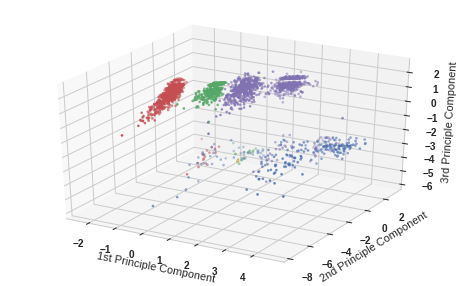

In [459]:
ClusterTest(datanorm1, 5, 'KMeans-trainbywhole',X_tilde1)

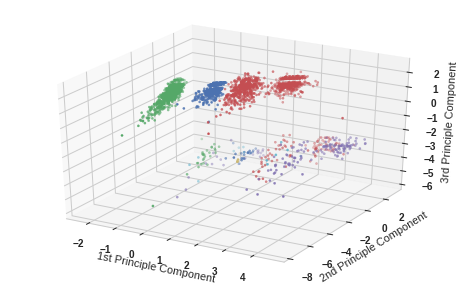

In [460]:
ClusterTest(datanorm1, 6, 'KMeans-trainbywhole',X_tilde1)

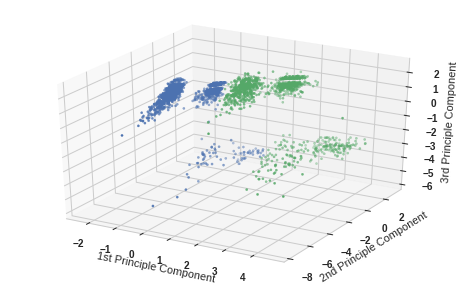

In [461]:
ClusterTest(X_tilde1.loc[:,['x','y','z']], 2, 'KMeans-trainbyPCA',X_tilde1)

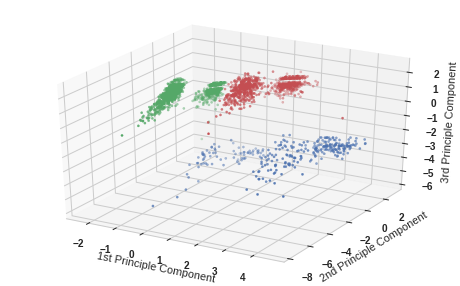

In [462]:
ClusterTest(X_tilde1.loc[:,['x','y','z']], 3, 'KMeans-trainbyPCA',X_tilde1)

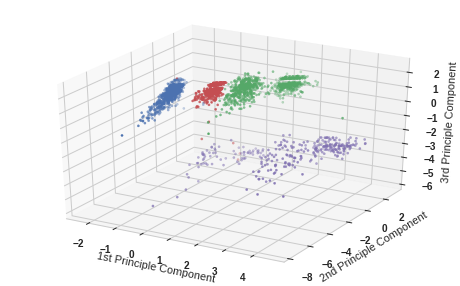

In [463]:
ClusterTest(X_tilde1.loc[:,['x','y','z']], 4, 'KMeans-trainbyPCA',X_tilde1)

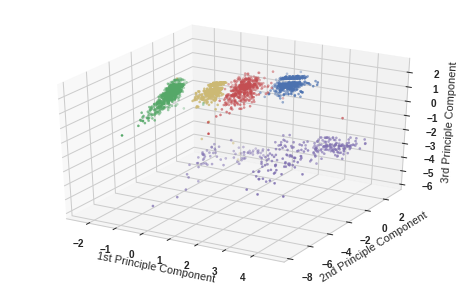

In [464]:
ClusterTest(X_tilde1.loc[:,['x','y','z']], 5, 'KMeans-trainbyPCA',X_tilde1)

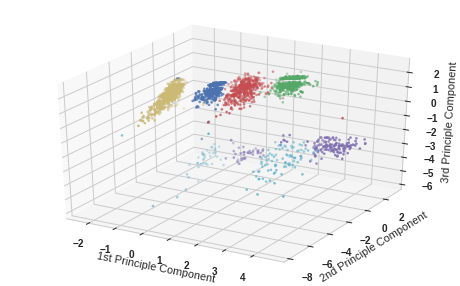

In [465]:
ClusterTest(X_tilde1.loc[:,['x','y','z']], 6, 'KMeans-trainbyPCA',X_tilde1)

In [466]:
X_tilde1.describe()

,x,y,z,price
count,2.710000e+03,2.710000e+03,2.710000e+03,2710.000000
mean,-5.726555e-14,-1.216575e-14,-1.708187e-14,137.994834
std,1.777690e+00,1.592818e+00,1.318611e+00,107.699382
min,-2.340609e+00,-7.730541e+00,-5.778999e+00,20.000000
25%,-1.675430e+00,-1.107905e+00,-4.653575e-01,70.000000
50%,-9.128490e-01,-9.301756e-02,7.892612e-02,109.500000
75%,1.452414e+00,1.446042e+00,1.034730e+00,170.000000
max,4.595022e+00,3.020674e+00,2.370307e+00,1195.000000
